In [1]:
import time
import config
import tmdbsimple as tmdb          # tmdbsimple 2.2.0
tmdb.API_KEY = config.tmdb_api_key # get TMDB API key from config.py file

import pprint as pp
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
print("Enter actor's full name...")
actor = input("... MUST be a string: ")
search = tmdb.Search()
actor_response = search.person(query=actor) 
actor_id = search.results[0]['id']
actor_id

Enter actor's full name...
... MUST be a string: Meryl Streep


5064

In [3]:
actor_movie_credits = actor + " Movies"
actor_movie_credits

'Meryl Streep Movies'

In [4]:
#Now get actor's credits
search_actor_id = tmdb.People(actor_id)
response_actor_id = search_actor_id.movie_credits()
response_actor_id
#actor_movie_credits = actor + " Credits")

{'cast': [{'character': 'Clarissa Vaughan',
   'credit_id': '52fe4258c3a36847f80172a9',
   'release_date': '2002-12-27',
   'vote_count': 901,
   'video': False,
   'adult': False,
   'vote_average': 7.4,
   'title': 'The Hours',
   'genre_ids': [18],
   'original_language': 'en',
   'original_title': 'The Hours',
   'popularity': 8.467,
   'id': 590,
   'backdrop_path': '/ApsB4lgVmAWF3R9dqSReRCcODHl.jpg',
   'overview': '"The Hours" is the story of three women searching for more potent, meaningful lives. Each is alive at a different time and place, all are linked by their yearnings and their fears. Their stories intertwine, and finally come together in a surprising, transcendent moment of shared recognition.',
   'poster_path': '/vRTqBRCLGiZNITXfdhGZd3tZ7Qh.jpg'},
  {'character': 'Karen Christence Dinesen Blixen',
   'credit_id': '52fe425cc3a36847f8018697',
   'poster_path': '/gYNfg38sM4aSpxfC8gPkwg5UZHN.jpg',
   'id': 606,
   'video': False,
   'vote_count': 631,
   'adult': False,
 

In [5]:
num_of_credits = len(response_actor_id['cast'][:])
num_of_credits   #how many movies

110

In [6]:
#Put all records in actor's first part of Data Frame (ie. hoffman_df)
labels = ['title','popularity','vote_average','vote_count']
idx = [film['id'] for film in response_actor_id['cast'][:]]
records = []
for film in (response_actor_id['cast'][:]):
    record = [film['title'], film['popularity'], film['vote_average'], film['vote_count']]
    records.append(record)

actor_df = pd.DataFrame.from_records(records, columns=labels, index=idx)
actor_df

,title,popularity,vote_average,vote_count
590,The Hours,8.467,7.4,901
606,Out of Africa,9.680,7.3,631
644,A.I. Artificial Intelligence,15.310,7.0,3652
688,The Bridges of Madison County,10.029,7.6,828
696,Manhattan,7.962,7.8,1195
350,The Devil Wears Prada,24.906,7.3,6873
2259,The House of the Spirits,7.956,6.8,312
2313,Prime,8.110,5.9,481
10315,Fantastic Mr. Fox,22.579,7.7,2446
2757,Adaptation.,10.277,7.4,1219


In [7]:
#Now get 2nd part of actor's df from the tmdb.Movies for merging
labels = ['revenue','budget','profit','genres']
film_indices = [film[0] for film in actor_df.iterrows()]
#print(film_indices)
records = []
request_rate_limit = 40     #TMDB has rate limit of 40 requests per 10 seconds

for film_idx in film_indices:
    request_rate_limit -= 1
    if request_rate_limit == 0:            
        print("Hold yer horses, cowboy!")
        print("...wait per request limit...")
        time.sleep(10)
        request_rate_limit = 39
    movie = tmdb.Movies(film_idx)  #Each movie has unique identifier stored as index of df
    response = movie.info()
        
    profit = response['revenue'] - response['budget']
    record = [response['revenue'], response['budget'], profit, response['genres']]    
    records.append(record)

actor_movies_df = pd.DataFrame.from_records(records, columns=labels, index=film_indices)
actor_movies_df    

Hold yer horses, cowboy!
...wait per request limit...
Hold yer horses, cowboy!
...wait per request limit...


,revenue,budget,profit,genres
590,41597830,25000000,16597830,"[{'id': 18, 'name': 'Drama'}]"
606,128499205,31000000,97499205,"[{'id': 36, 'name': 'History'}, {'id': 10749, ..."
644,235926552,100000000,135926552,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam..."
688,182016617,24000000,158016617,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n..."
696,39946780,0,39946780,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
350,326551094,35000000,291551094,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2259,0,25000000,-25000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ..."
2313,0,0,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
10315,46471023,40000000,6471023,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '..."
2757,32801173,19000000,13801173,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam..."


In [9]:
print(actor_df.shape)
actor_df.head(5)

(110, 4)


,title,popularity,vote_average,vote_count
590,The Hours,8.467,7.4,901
606,Out of Africa,9.680,7.3,631
644,A.I. Artificial Intelligence,15.310,7.0,3652
688,The Bridges of Madison County,10.029,7.6,828
696,Manhattan,7.962,7.8,1195


In [10]:
print(actor_movies_df.shape)
actor_movies_df.head(5)

(110, 4)


,revenue,budget,profit,genres
590,41597830,25000000,16597830,"[{'id': 18, 'name': 'Drama'}]"
606,128499205,31000000,97499205,"[{'id': 36, 'name': 'History'}, {'id': 10749, ..."
644,235926552,100000000,135926552,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam..."
688,182016617,24000000,158016617,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n..."
696,39946780,0,39946780,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."


In [11]:
# This builds the full df, still need to build final
actor_full_df = pd.merge(actor_df, actor_movies_df, left_index=True, right_index=True)
print(actor_full_df.shape)
actor_full_df

(110, 8)


,title,popularity,vote_average,vote_count,revenue,budget,profit,genres
590,The Hours,8.467,7.4,901,41597830,25000000,16597830,"[{'id': 18, 'name': 'Drama'}]"
606,Out of Africa,9.680,7.3,631,128499205,31000000,97499205,"[{'id': 36, 'name': 'History'}, {'id': 10749, ..."
644,A.I. Artificial Intelligence,15.310,7.0,3652,235926552,100000000,135926552,"[{'id': 18, 'name': 'Drama'}, {'id': 878, 'nam..."
688,The Bridges of Madison County,10.029,7.6,828,182016617,24000000,158016617,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n..."
696,Manhattan,7.962,7.8,1195,39946780,0,39946780,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
350,The Devil Wears Prada,24.906,7.3,6873,326551094,35000000,291551094,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
2259,The House of the Spirits,7.956,6.8,312,0,25000000,-25000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ..."
2313,Prime,8.110,5.9,481,0,0,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
10315,Fantastic Mr. Fox,22.579,7.7,2446,46471023,40000000,6471023,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '..."
2757,Adaptation.,10.277,7.4,1219,32801173,19000000,13801173,"[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam..."


In [12]:
#Save to PostgrSQL 

In [13]:
#Create new column containing a list of genres for each movie
def to_list(cell):
    #input is a single cell containing a list of dicts
    #rreturns a list of genres as unique strings
    l = []
    for d in cell:     #cell is list of dicts
        l.append(d['name'])
    return(l)

actor_full_df['genre_names'] = actor_full_df['genres'].map(to_list)
#Drop duplicate info
actor_full_df.drop(['genres'], axis=1, inplace=True)
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
590,The Hours,8.467,7.4,901,41597830,25000000,16597830,[Drama]
606,Out of Africa,9.680,7.3,631,128499205,31000000,97499205,"[History, Romance, Drama]"
644,A.I. Artificial Intelligence,15.310,7.0,3652,235926552,100000000,135926552,"[Drama, Science Fiction, Adventure]"
688,The Bridges of Madison County,10.029,7.6,828,182016617,24000000,158016617,"[Drama, Romance]"
696,Manhattan,7.962,7.8,1195,39946780,0,39946780,"[Comedy, Drama, Romance]"
350,The Devil Wears Prada,24.906,7.3,6873,326551094,35000000,291551094,"[Comedy, Drama, Romance]"
2259,The House of the Spirits,7.956,6.8,312,0,25000000,-25000000,"[Romance, Drama]"
2313,Prime,8.110,5.9,481,0,0,0,"[Comedy, Drama, Romance]"
10315,Fantastic Mr. Fox,22.579,7.7,2446,46471023,40000000,6471023,"[Adventure, Animation, Comedy, Family]"
2757,Adaptation.,10.277,7.4,1219,32801173,19000000,13801173,"[Comedy, Crime, Drama]"


In [14]:
print(actor_full_df.shape)
actor_full_df.describe()

(110, 8)


,popularity,vote_average,vote_count,revenue,budget,profit
count,110.000000,110.000000,110.000000,1.100000e+02,1.100000e+02,1.100000e+02
mean,5.746318,5.680909,505.200000,4.132208e+07,1.495909e+07,2.636299e+07
std,5.621310,2.592597,1033.038138,8.864284e+07,2.661811e+07,7.180255e+07
min,0.600000,0.000000,0.000000,0.000000e+00,0.000000e+00,-3.500000e+07
25%,1.125500,5.825000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.353500,6.500000,32.500000,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.228750,7.000000,487.000000,4.525272e+07,2.375000e+07,1.695316e+07
max,25.316000,10.000000,6873.000000,6.098416e+08,1.400000e+08,5.578416e+08


Delete rows with non-movies (eg. Documentary(99), TV Movie(10770) ). Deciding what constitutes a genre.
1. Eliminate rows containing Documentery or TV Movie as a genre.
2. Eliminate rows where revenue or budget are zero.

In [15]:
actor_full_df.head(3)

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
590,The Hours,8.467,7.4,901,41597830,25000000,16597830,[Drama]
606,Out of Africa,9.680,7.3,631,128499205,31000000,97499205,"[History, Romance, Drama]"
644,A.I. Artificial Intelligence,15.310,7.0,3652,235926552,100000000,135926552,"[Drama, Science Fiction, Adventure]"


In [ ]:
# If Genres is in Documentary(99), TV Movie(10770), delete the row.
# If revenue, budget or profit is zero or NaN, eliminate the row.
# If vote_count	< 20, eliminate the row.
#hoffman_full_df.isnull().sum()


In [16]:
#Function removes Documentary(99) and TV Movie(10770) genres on each cell
def exclude_genres(cell):
    '''looks for excluded values in a cell
       returns boolean mask'''
    excluded_genre = ['TV Movie','Documentary']
#    print(cell)
    if len(cell) == 0:
        return False
    else:
        for g in excluded_genre:
            if g in cell:
                return False
    return True

#  .map to genres column
actor_full_df = actor_full_df[actor_full_df.genre_names.map(exclude_genres)]            
actor_full_df

,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
590,The Hours,8.467,7.4,901,41597830,25000000,16597830,[Drama]
606,Out of Africa,9.680,7.3,631,128499205,31000000,97499205,"[History, Romance, Drama]"
644,A.I. Artificial Intelligence,15.310,7.0,3652,235926552,100000000,135926552,"[Drama, Science Fiction, Adventure]"
688,The Bridges of Madison County,10.029,7.6,828,182016617,24000000,158016617,"[Drama, Romance]"
696,Manhattan,7.962,7.8,1195,39946780,0,39946780,"[Comedy, Drama, Romance]"
350,The Devil Wears Prada,24.906,7.3,6873,326551094,35000000,291551094,"[Comedy, Drama, Romance]"
2259,The House of the Spirits,7.956,6.8,312,0,25000000,-25000000,"[Romance, Drama]"
2313,Prime,8.110,5.9,481,0,0,0,"[Comedy, Drama, Romance]"
10315,Fantastic Mr. Fox,22.579,7.7,2446,46471023,40000000,6471023,"[Adventure, Animation, Comedy, Family]"
2757,Adaptation.,10.277,7.4,1219,32801173,19000000,13801173,"[Comedy, Crime, Drama]"


In [17]:
#Eliminate the rows without budget or revenue data
good_money_df = actor_full_df[(actor_full_df.budget > 0.0) & (actor_full_df.revenue > 0.0)]
pd.options.display.float_format = '{:,.2f}'.format
#good_money_df['revenue'] = good_money_df['revenue'].apply(lambda x: '{:d}'.format(x))

#good_money_df['budget'] = good_money_df['budget'].apply(lambda x: '{:,.2f}'.format(x))

#good_money_df['profit'] = good_money_df['profit'].apply(lambda x: '{:,.2f}'.format(x))
#print(good_money_df.info())
print(good_money_df.shape)
print(good_money_df.describe())
good_money_df

(38, 8)
       popularity  vote_average  vote_count        revenue         budget  \
count       38.00         38.00       38.00          38.00          38.00   
mean        11.21          6.76    1,367.71 115,896,408.84  40,934,210.53   
std          5.46          0.61    1,389.17 119,059,832.78  31,201,648.23   
min          5.71          5.30       89.00   3,442,853.00   8,000,000.00   
25%          7.96          6.40      428.75  41,393,453.50  20,500,000.00   
50%          9.32          6.70      898.00  70,584,696.50  29,500,000.00   
75%         11.82          7.27    1,796.00 162,674,806.25  50,000,000.00   
max         25.32          8.00    6,873.00 609,841,637.00 140,000,000.00   

              profit  
count          38.00  
mean   74,962,198.32  
std   105,692,911.12  
min   -12,557,147.00  
25%    14,377,370.75  
50%    38,490,228.00  
75%    98,069,801.25  
max   557,841,637.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
590,The Hours,8.47,7.40,901,41597830,25000000,16597830,[Drama]
606,Out of Africa,9.68,7.30,631,128499205,31000000,97499205,"[History, Romance, Drama]"
644,A.I. Artificial Intelligence,15.31,7.00,3652,235926552,100000000,135926552,"[Drama, Science Fiction, Adventure]"
688,The Bridges of Madison County,10.03,7.60,828,182016617,24000000,158016617,"[Drama, Romance]"
350,The Devil Wears Prada,24.91,7.30,6873,326551094,35000000,291551094,"[Comedy, Drama, Romance]"
10315,Fantastic Mr. Fox,22.58,7.70,2446,46471023,40000000,6471023,"[Adventure, Animation, Comedy, Family]"
2757,Adaptation.,10.28,7.40,1219,32801173,19000000,13801173,"[Comedy, Crime, Drama]"
4515,Lions for Lambs,9.27,6.10,393,63215872,35000000,28215872,"[Action, Adventure, Drama, History]"
5125,Rendition,7.39,6.40,355,24748670,27500000,-2751330,"[Drama, Thriller]"
22414,Postcards from the Edge,7.92,6.60,111,39071603,22000000,17071603,"[Comedy, Drama]"


In [18]:
print("Enter valid genre: ")
test_for_genre = input("... MUST be a capitalized: ")

def is_genre(cell):
    #returns True if in, else false (for masking)
    if test_for_genre in cell:
        return True 
    return False

tested_for_genre_df = good_money_df[good_money_df.genre_names.map(is_genre)]
not_tested_for_genre_df = good_money_df[False == good_money_df.genre_names.map(is_genre)]

print(tested_for_genre_df.shape)
print(tested_for_genre_df.describe())
tested_for_genre_df.head(3)

Enter valid genre: 
... MUST be a capitalized: Drama
(27, 8)
       popularity  vote_average  vote_count        revenue         budget  \
count       27.00         27.00       27.00          27.00          27.00   
mean         9.75          6.88    1,199.59  82,460,517.19  28,833,333.33   
std          3.79          0.53    1,442.51  76,486,922.84  20,113,619.57   
min          5.71          5.80       89.00   3,442,853.00   8,000,000.00   
25%          8.00          6.50      399.00  31,418,586.50  17,000,000.00   
50%          8.61          6.80      866.00  50,907,234.00  25,000,000.00   
75%         10.09          7.30    1,104.00 114,618,875.00  30,500,000.00   
max         24.91          8.00    6,873.00 326,551,094.00 100,000,000.00   

              profit  
count          27.00  
mean   53,627,183.85  
std    68,191,921.86  
min   -12,557,147.00  
25%    14,953,568.50  
50%    28,215,872.00  
75%    93,519,852.00  
max   291,551,094.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
590,The Hours,8.47,7.40,901,41597830,25000000,16597830,[Drama]
606,Out of Africa,9.68,7.30,631,128499205,31000000,97499205,"[History, Romance, Drama]"
644,A.I. Artificial Intelligence,15.31,7.00,3652,235926552,100000000,135926552,"[Drama, Science Fiction, Adventure]"


In [21]:
#Not in genre info
print(not_tested_for_genre_df.shape)
print(not_tested_for_genre_df.describe())
not_tested_for_genre_df.head(3)  

(11, 8)
       popularity  vote_average  vote_count        revenue         budget  \
count       11.00         11.00       11.00          11.00          11.00   
mean        14.78          6.47    1,780.36 197,966,324.73  70,636,363.64   
std          7.30          0.71    1,210.99 163,738,347.82  34,415,905.41   
min          6.87          5.30      352.00  46,471,023.00  40,000,000.00   
25%          8.94          6.05      736.00  80,000,423.00  50,000,000.00   
50%         12.01          6.60    1,700.00 167,225,525.00  55,000,000.00   
75%         21.77          6.85    2,722.50 216,003,013.50  80,000,000.00   
max         25.32          7.70    3,913.00 609,841,637.00 140,000,000.00   

              profit  
count          11.00  
mean  127,329,961.09  
std   158,103,429.93  
min     5,181,129.00  
25%    30,000,423.00  
50%    92,225,525.00  
75%   148,503,013.50  
max   557,841,637.00  


,title,popularity,vote_average,vote_count,revenue,budget,profit,genre_names
10315,Fantastic Mr. Fox,22.58,7.70,2446,46471023,40000000,6471023,"[Adventure, Animation, Comedy, Family]"
22897,It's Complicated,7.01,6.40,731,219103655,85000000,134103655,"[Comedy, Romance]"
11631,Mamma Mia!,12.01,6.90,3913,609841637,52000000,557841637,"[Comedy, Romance]"
11774,Lemony Snicket's A Series of Unfortunate Events,25.15,6.80,3139,209073645,140000000,69073645,"[Adventure, Comedy, Family]"
8987,The River Wild,6.87,6.40,423,94216343,45000000,49216343,"[Action, Adventure, Crime, Thriller]"
9374,Death Becomes Her,10.21,6.60,1267,149022650,55000000,94022650,"[Comedy, Fantasy]"
9906,The Ant Bully,11.26,5.60,741,55181129,50000000,5181129,"[Fantasy, Adventure, Animation, Comedy, Family]"
224141,Into the Woods,20.97,5.70,2999,212902372,50000000,162902372,"[Fantasy, Comedy]"
1792,Stuck on You,7.67,5.30,352,65784503,55000000,10784503,[Comedy]
400650,Mary Poppins Returns,25.32,6.60,1700,348807090,130000000,218807090,"[Fantasy, Family, Comedy]"


In [22]:
len(tested_for_genre_df['popularity'])

27

[Text(0, 0, 'Drama'), Text(0, 0, 'Not Drama')]

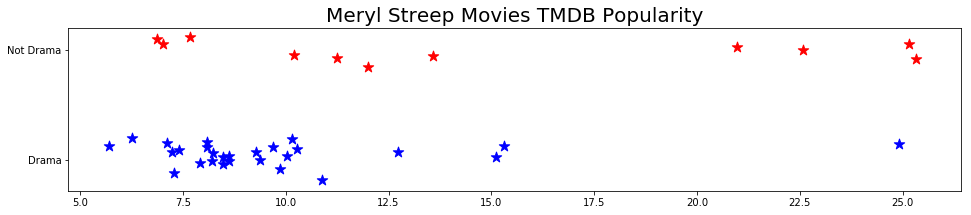

In [23]:
#Plot the distribution for popularity

fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['popularity'], np.repeat(0, len(tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['popularity'])), marker="*", c='blue', s=120)
ax.scatter(not_tested_for_genre_df['popularity'], np.repeat(1, len(not_tested_for_genre_df['popularity'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['popularity'])),marker="*", c='red', s=120)
plt.title(actor + ' Movies TMDB Popularity', size = 20)
ax.set_yticks([0, 1])

ax.set_yticklabels([test_for_genre, "Not " + test_for_genre])  #generalize the label for and genre
#plt.tight_layout()

Null Hypothesis: H0 - There is no difference in the popularity of Hoffman's movies in drama vs. non-dramatic categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test

In [24]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'])
genre_wins = count_winning_pairs(tested_for_genre_df['popularity'], not_tested_for_genre_df['popularity'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['profit'])*len(tested_for_genre_df['profit'])))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))
print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))

Total Number of Comparisons: 297

Number of 'Not-in-Genre' Movie Wins: 207.0

Number of In Genre: Drama Movie Wins: 90.0


The total number of wins is the total number of comparisons between a popularity of an "in genre" movie and the popularity of a not-in-genre movie.

In [25]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['popularity'], tested_for_genre_df['popularity'], alternative="greater")
print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not-in-Genre' Movie Popularity > Drama Movie Popularity: 0.031


*********************************

Clearly, Non Dramatic Meryl Streep movies are more popular than her Dramatic movies, 
at least in the measure of popularity in the TMDB.

*****Note that this conclusion will change for each actor and each genre tested!!!!

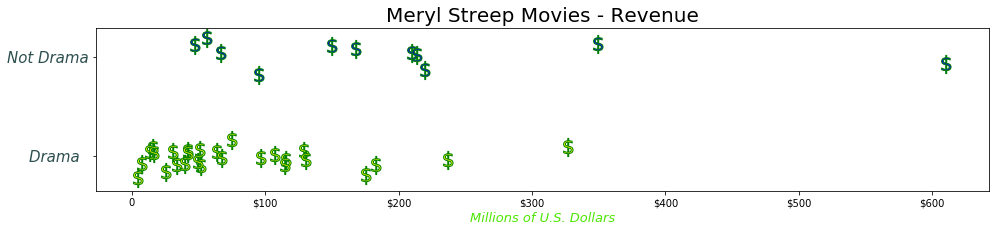

In [26]:
#Plot the distribution for profit
fig, ax = plt.subplots(1, figsize=(16, 3))
ax.scatter(tested_for_genre_df['revenue'], np.repeat(0, len(tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(tested_for_genre_df['revenue'])), marker='$''\$''$', c='yellow', edgecolors='green', s=330)
ax.scatter(not_tested_for_genre_df['revenue'], np.repeat(1, len(not_tested_for_genre_df['revenue'])) + np.random.normal(0, 0.1, len(not_tested_for_genre_df['revenue'])),marker='$''\$''$',c='blue', edgecolors='green', s=330)
plt.title(actor + ' Movies - Revenue', size=20)


def format_func(value, tick_number):
    # find number of multiples of pi/2
    N = int(np.round(value / 1000000))
    if N == 0:
        return "0"
    elif N == 100:
        return ("$100")
    elif N == 200:
        return ("$200")
    elif N == 300:
        return ("$300")
    elif N == 400:
        return ("$400")
    elif N == 500:
        return ("$500")
    elif N == 600:
        return ("$600")
    elif N == 700:
        return ("$700")
    else:
        return ("$800")

ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
ax.set_xlabel('Millions of U.S. Dollars', backgroundcolor='white', color=(.3, .9, .01), animated=True, fontstyle='italic', size=13)
ax.set_yticks([0, 1])
_nothing = ax.set_yticklabels([test_for_genre + "  ", "Not " + test_for_genre], fontstyle='oblique', color=(.18, .31, .31), size='15')
#plt.tight_layout()

******
Null Hypothesis: H0 - There is no difference in the revenue of Hoffman's movies in drama vs. non-dramatic categories.
This hypothesis will be tested with the Rank Sum Statistic aka the U-Test
*******Note that this will change for each actor and genre tested.

In [27]:
def count_winning_pairs(sample_1, sample_2):
    sample_1, sample_2 = np.array(sample_1), np.array(sample_2)
    n_total_wins = 0
    for x in sample_1:
        n_wins = np.sum(x > sample_2) + 0.5*np.sum(x == sample_2)
        n_total_wins += n_wins
    return n_total_wins

not_genre_wins = count_winning_pairs(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'])
genre_wins = count_winning_pairs(tested_for_genre_df['revenue'], not_tested_for_genre_df['revenue'])
print("Total Number of Comparisons: {}\n".format(len(not_tested_for_genre_df['revenue'])*len(tested_for_genre_df['revenue'])))
print("Number of 'Not-in-Genre' Movie Wins: {}\n".format(not_genre_wins))
print("Number of In Genre: " + test_for_genre + " Movie Wins: {}".format(genre_wins))

Total Number of Comparisons: 297

Number of 'Not-in-Genre' Movie Wins: 232.0

Number of In Genre: Drama Movie Wins: 65.0


Remember, the total number of "wins" is the total number of comparisons between the revenue of a in-genre movie and the revenue of a not-in-genre movie.

In [28]:
# Now, using the U-Test (aka the Mann-Whitney U Statistic) calculate 
#    the Rank Sum Statistic
res = stats.mannwhitneyu(not_tested_for_genre_df['revenue'], tested_for_genre_df['revenue'], alternative="greater")

print("p-value for 'Not-in-Genre' Movie Popularity > " + test_for_genre + " Movie Popularity: {:2.3f}".format(res.pvalue))

p-value for 'Not-in-Genre' Movie Popularity > Drama Movie Popularity: 0.004


******
Clearly, Non-Dramatic Meryl Streep movies make more money than her Dramatic movies.
*****Note that this conclusion willchange for each actor & genre tested.